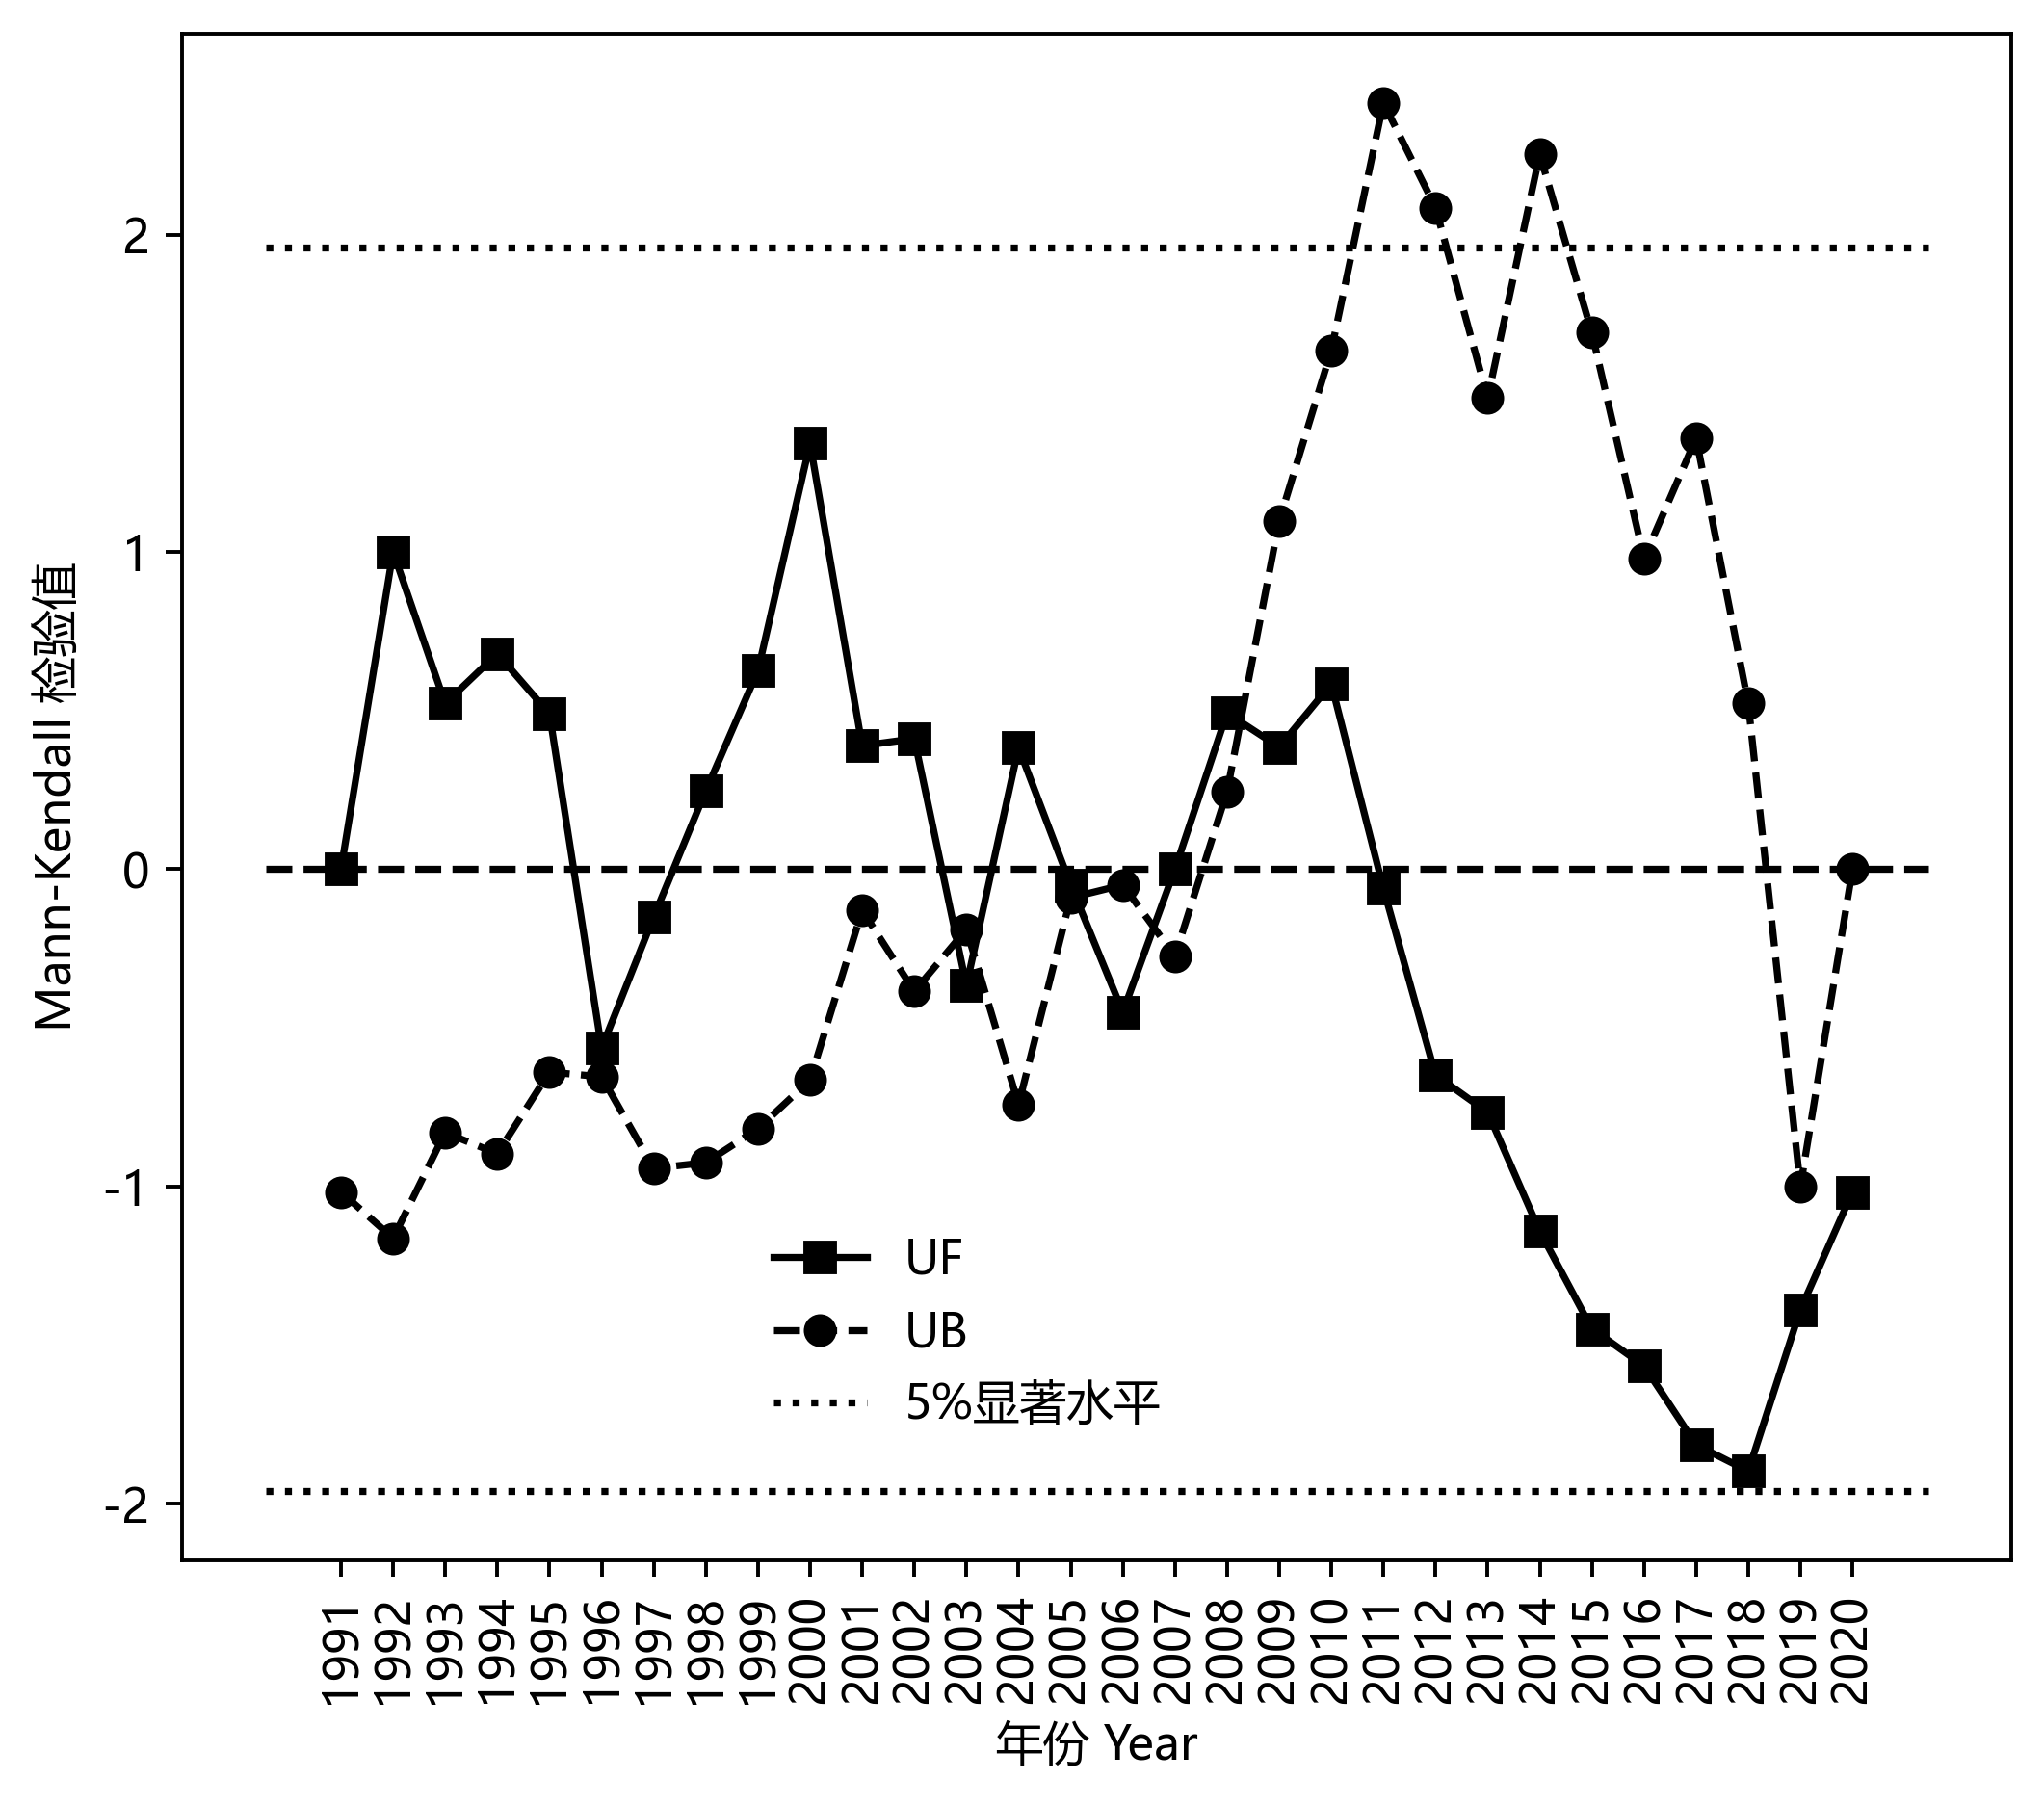

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = ['MicroSoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("LPItest.xlsx")

# 获取数据
x = df['year']
y = df['data3']

n = len(y)

# 正序计算
# 定义累计量序列Sk，长度n，初始值为0
Sk = np.zeros(n)
UFk = np.zeros(n)

# 定义Sk序列元素s
s = 0

for i in range(1, n):
    for j in range(0,i):
        if y.iloc[i] > y.iloc[j]:
            s += 1
    Sk[i] = s
    E = (i+1)*(i/4)
    Var = (i+1)*i*(2*(i+1)+5)/72
    UFk[i] = (Sk[i] - E)/np.sqrt(Var)
    
# 逆序计算
# 定义逆累计量序列Sk2
# 定义逆统计量序列Sk2
y2 = np.zeros(n)
Sk2 = np.zeros(n)
UBk = np.zeros(n)

s = 0
y2 = y[::-1]

for i in range(1, n):
    for j in range(0,i):
        if y2.iloc[i] > y2.iloc[j]:
            s += 1
    Sk2[i] = s
    E = (i+1)*(i/4)
    Var = (i+1)*i*(2*(i+1)+5)/72
    UBk[i] = -(Sk2[i] - E)/np.sqrt(Var)

UBk2 = UBk[::-1]

# 画图
plt.figure(figsize=(7, 6), dpi=350)
plt.plot(range(30,),UFk, label='UF', color='black',marker='s')
plt.plot(range(30,), UBk2, label='UB',color='black', linestyle='--', marker='o')
plt.ylabel('Mann-Kendall 检验值')
plt.xlabel('年份 Year')

# 添加辅助线
x_lim = plt.xlim()
# 添加显著水平线和y=0
plt.plot(x_lim,[-1.96,-1.96],':',color='black',label='5%显著水平')
plt.plot(x_lim, [0,0],'--',color='black')
plt.plot(x_lim,[1.96,1.96],':',color='black')
plt.xticks(range(30), x.tolist(), rotation=90)
# plt.legend(loc='upper right', bbox_to_anchor=(0.9,0.95),ncol=3,fancybox=True)

# 设置图例位置，第一个参数调整左右位置，第二个参数调整上下位置
plt.legend(bbox_to_anchor=(0.3,0.24), facecolor='w',frameon=False)
# 添加文本注释
# plt.text(-0.9,2.25,'突变点检验')
plt.savefig("MK检验.png")
plt.show()